In [56]:
import pandas
import pickle
import json
import numpy
from scipy.stats import binned_statistic

from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo

In [2]:
def profile_histogram(x, y, xbins, yerr=None, weights=None, median=False, weighted=False):
    """Compute a profile histogram from scattered data.
    
    Parameters
    ----------
    x : list or ndarray
        Ordinates (independent variable).
    y : list or ndarray
        Coordinates (dependent variable).
    xbins : list or ndarray
        Bin edges for the independent variable.
    yerr : list or ndarray
        Uncertainties on the dependent variable. Assumed independent.
    weights : list or ndarray
        If not None (and weighted=True), will use this instead of yerr to weight 
        the summary statistics.
    median : bool
        If true, compute median as central value; else, the (weighted) mean.
    weighted : bool
        Weight the summary statistics, either by the uncertainty in y or the 
        provided weights.
        
    Returns
    -------
    N : ndarray
        Unweighted counts per bin.
    h : ndarray
        Summary statistic (mean or median) of independent variable per bin.
    e : ndarray
        Uncertainty on the summary statistic per bin.
    """
    
    N = binned_statistic(x, y, bins=xbins, statistic='count').statistic

    if weighted:
        if (yerr is None) and (weights is None):
            raise ValueError('need to define either yerr or weights if using weighted fit.')

        if weights is None:
            # weight based on yerr
            w = 1/yerr**2
        else:
            w = weights
        W, H, E = binned_statistic(x, [w, w*y, w*y**2], bins=xbins, statistic='sum').statistic
        h = H/W
        e = 1/numpy.sqrt(W)
    else:
        mean, mean2 = binned_statistic(x, [y, y**2], bins=xbins, statistic='mean').statistic
        h = mean
        e = numpy.sqrt((mean2 - mean**2) / (N - 1))

    if median:
        h = binned_statistic(x, y, bins=xbins, statistic='median').statistic
    
    return N, h, e

In [44]:
df = pandas.read_pickle("/Users/akim/Projects/TFPV/data/DESI-DR1_TF_pv_cat_v13_cut.pkl")
# df = pandas.read_pickle("~/Downloads/DESI-DR1_TF_pv_cat_v10_cut.pkl")
# df = df[df["MU_ALEX_ERR"] < 1]

In [33]:
# df_c = pandas.read_pickle("/Users/akim/Projects/TFPV/data_fit/clustered/DESI-DR1_TF_pv_cat_v13_cut.pkl")
df = pandas.read_pickle("/Users/akim/Projects/TFPV/data_fit/unclustered/DESI-DR1_TF_pv_cat_v13_cut.pkl")

/var/folders/yn/3gv_swsd6_g6b8c561znbbhm0000gq/T/ipykernel_89630/2747445174.py:50: RuntimeWarning: invalid value encountered in divide
  e = numpy.sqrt((mean2 - mean**2) / (N - 1))


Text(0, 0.5, 'MU - MU_CMB')

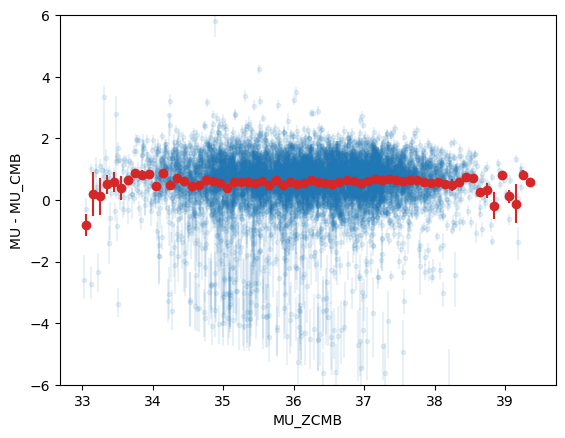

In [38]:
mubins = numpy.arange(33,39.5,0.1)
muc = 0.5*(mubins[1:] + mubins[:-1])
dmu = 0.5*numpy.diff(mubins)

_, deltamu_avg, deltamu_std = profile_histogram(df['MU_ZCMB'], df["MU_ALEX"]-df['MU_ZCMB'], mubins)
plt.errorbar(df["MU_ZCMB"], df["MU_ALEX_50"]-df['MU_ZCMB'],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]], fmt='.',label="MU_ALEX",alpha=0.1)
plt.errorbar(muc, deltamu_avg, xerr=dmu, yerr=deltamu_std, fmt='o', color='tab:red')

plt.ylim((-6,6))
plt.xlabel("MU_ZCMB")
plt.ylabel("MU - MU_CMB")

Text(0, 0.5, 'MU - MU_CMB')

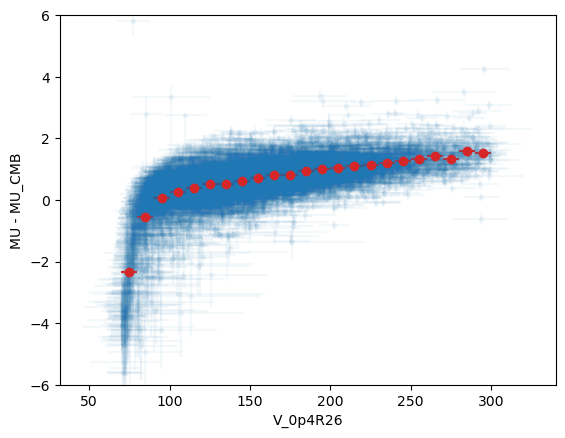

In [40]:
mubins = numpy.arange(50,400,10)
muc = 0.5*(mubins[1:] + mubins[:-1])
dmu = 0.5*numpy.diff(mubins)

_, deltamu_avg, deltamu_std = profile_histogram(df['V_0p4R26'], df["MU_ALEX"]-df['MU_ZCMB'], mubins)

plt.errorbar(df["V_0p4R26"], df["MU_ALEX_50"]-df['MU_ZCMB'],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]],
             df["V_0p4R26_ERR"], fmt='.',label="MU_ALEX",alpha=0.05)
plt.errorbar(muc, deltamu_avg, xerr=dmu, yerr=deltamu_std, fmt='o', color='tab:red')
plt.ylim((-6,6))
plt.xlabel("V_0p4R26")
plt.ylabel("MU - MU_CMB")

In [41]:
w =  df["MU_ALEX_50"]-df['MU_ZCMB'] < -3

Text(0.5, 0, '$i$')

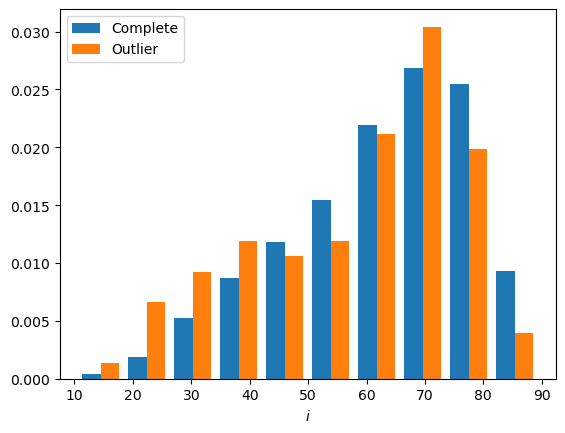

In [73]:
q0=0.2
i = numpy.arccos(numpy.sqrt((df['BA']**2-q0**2)/(1-q0**2)))*180/numpy.pi
plt.hist([i,i[w]],label=["Complete","Outlier"],density=True)
plt.legend()
plt.xlabel(r'$i$')

Text(0.5, 0, 'D25_LEDA dA^2')

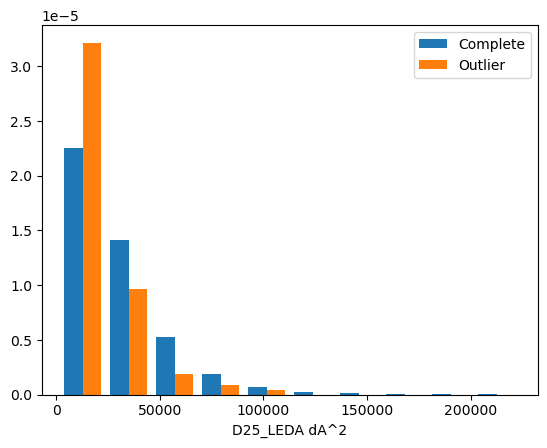

In [69]:
dA = cosmo.angular_diameter_distance(df['Z_DESI'])
df['D25_LEDA']*dA.value**2
df[w]['D25_LEDA']*dA.value[w]**2
plt.hist([df['D25_LEDA']*dA.value**2,df[w]['D25_LEDA']*dA.value[w]**2],label=["Complete","Outlier"],density=True)
plt.legend()
plt.xlabel('D25_LEDA dA^2')

In [45]:
df.columns.tolist()

['Unnamed: 0',
 'SGA_ID',
 'SGA_GALAXY',
 'GALAXY',
 'PGC',
 'RA_LEDA',
 'DEC_LEDA',
 'MORPHTYPE',
 'PA_LEDA',
 'D25_LEDA',
 'BA_LEDA',
 'Z_LEDA',
 'SB_D25_LEDA',
 'MAG_LEDA',
 'BYHAND',
 'REF',
 'GROUP_ID',
 'GROUP_NAME',
 'GROUP_MULT',
 'GROUP_PRIMARY',
 'GROUP_RA',
 'GROUP_DEC',
 'GROUP_DIAMETER',
 'BRICKNAME',
 'RA',
 'DEC',
 'D26',
 'D26_REF',
 'PA',
 'BA',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'G_SMA50',
 'R_SMA50',
 'Z_SMA50',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'G_MAG_SB22',
 'R_MAG_SB22',
 'Z_MAG_SB22',
 'G_MAG_SB22.5',
 'R_MAG_SB22.5',
 'Z_MAG_SB22.5',
 'G_MAG_SB23',
 'R_MAG_SB23',
 'Z_MAG_SB23',
 'G_MAG_SB23.5',
 'R_MAG_SB23.5',
 'Z_MAG_SB23.5',
 'G_MAG_SB24',
 'R_MAG_SB24',
 'Z_MAG_SB24',
 'G_MAG_SB24.5',
 'R_MAG_SB24.5',
 'Z_MAG_SB24.5',
 'G_MAG_SB25',
 'R_MAG_SB25',
 'Z_MAG_SB25',
 'G_MAG_SB25.5',
 'R_MAG_SB25.5',
 'Z_MAG_SB25.5',
 'G_MAG_SB26',
 'R_MAG_SB26',
 'Z_MAG_SB26',
 

In [61]:
dA = cosmo.angular_diameter_distance(df['Z_DESI'])
print(dA.value)

[325.60348095 184.81448706 358.18651949 ... 211.95427711 450.92158493
 234.43002758]


(-4.0, 4.0)

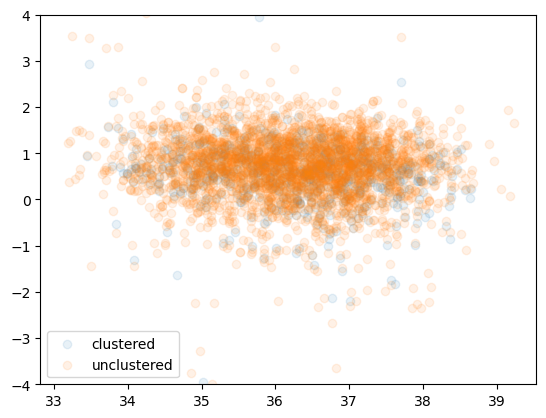

In [249]:
plt.scatter(df_c["MU_ZCMB"], df_c["MU_ALEX_50"]- df_c["MU_ZCMB"],label="clustered",alpha=0.1)
plt.scatter(df_u["MU_ZCMB"], df_u["MU_ALEX_50"]- df_u["MU_ZCMB"],label="unclustered",alpha=0.1)
plt.legend()
plt.ylim((-4,4))

(-4.0, 4.0)

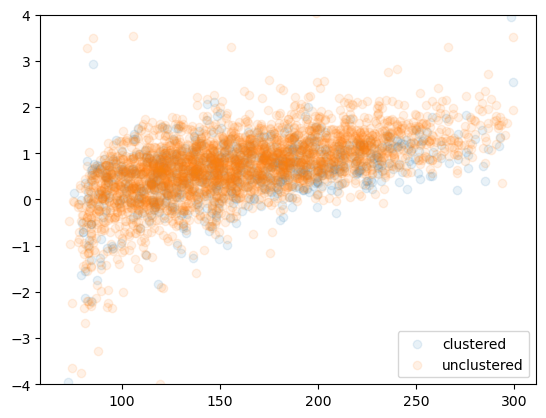

In [248]:
plt.scatter(df_c["V_0p4R26"], df_c["MU_ALEX_50"]- df_c["MU_ZCMB"],label="clustered",alpha=0.1)
plt.scatter(df_u["V_0p4R26"], df_u["MU_ALEX_50"]- df_u["MU_ZCMB"],label="unclustered",alpha=0.1)
plt.legend()
plt.ylim((-4,4))

In [223]:
df =df_u

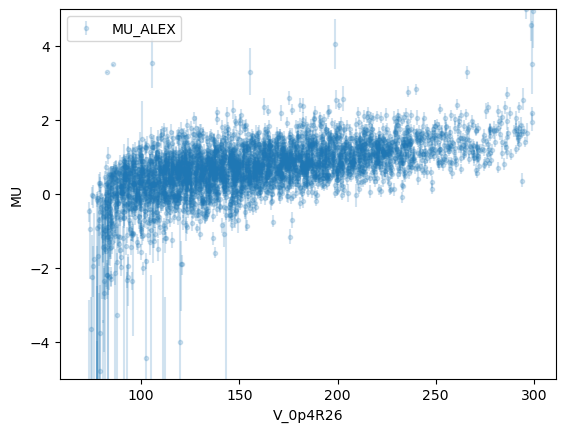

In [259]:
plt.errorbar(df["V_0p4R26"], df["MU_ALEX_50"]-df["MU_ZCMB"],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]], fmt='.',label="MU_ALEX",alpha=0.2)
# plt.scatter(df["V_0p4R26"], df["MU_TF"], label="MU_TF",color="orange")
plt.ylim((-5,5))
plt.xlabel("V_0p4R26")
plt.ylabel("MU")
plt.legend()

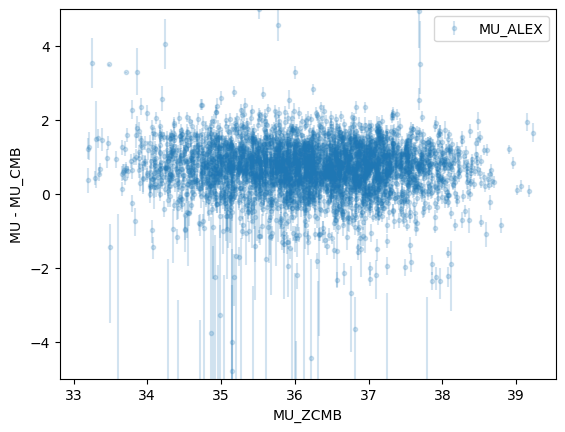

In [260]:
plt.errorbar(df["MU_ZCMB"], df["MU_ALEX_50"]-df["MU_ZCMB"],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]], fmt='.',label="MU_ALEX",alpha=0.2)
# plt.scatter(df["MU_ZCMB"], df["MU_TF"]-df["MU_ZCMB"],label="MU_TF")
plt.ylim((-5,5))
plt.xlabel("MU_ZCMB")
plt.ylabel("MU - MU_CMB")
plt.legend()

Text(0, 0.5, 'MU_ALEX_50-MU_TF')

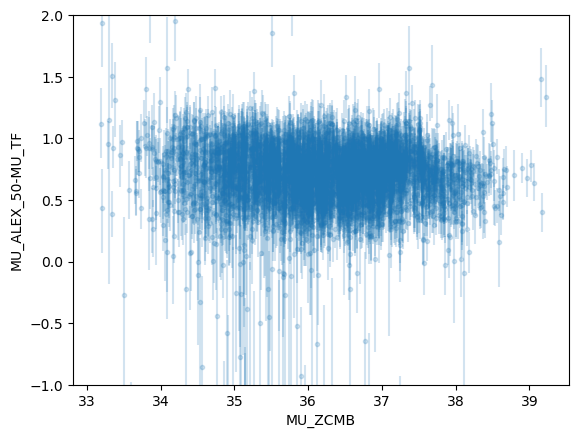

In [253]:
# plt.scatter(df["MU_ZCMB"],df["MU_ALEX"]-df["MU_TF"])
plt.errorbar(df["MU_ZCMB"], df["MU_ALEX_50"]-df["MU_TF"],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]], fmt='.',label="MU_ALEX",alpha=0.2)

plt.ylim((-1,2))
plt.xlabel('MU_ZCMB')
plt.ylabel('MU_ALEX_50-MU_TF')

(0.2, 1.0)

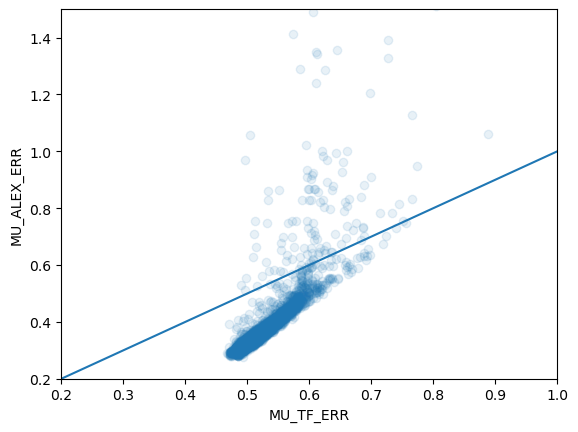

In [257]:
plt.scatter(df["MU_TF_ERR"],df["MU_ALEX_ERR"],alpha=0.1)
plt.plot([0,1],[0,1])
plt.xlabel('MU_TF_ERR')
plt.ylabel('MU_ALEX_ERR')
plt.ylim((0.2,1.5))
plt.xlim((0.2,1.))

In [161]:
import os
from astropy.cosmology import Planck18 as cosmo

DATA_DIR = os.environ.get('DATA_DIR', '/Users/akim/Projects/TFPV/data_fit')
OUTPUT_DIR = os.environ.get('OUTPUT_DIR', '/Users/akim/Projects/TFPV/output_fit')
RELEASE_DIR = os.environ.get('RELEASE_DIR', 'Y1')
pvcat = os.path.join(DATA_DIR, RELEASE_DIR, 'DESI-DR1_TF_pv_cat_v10.fits')
dat = Table.read(pvcat, format='fits')
df = dat.to_pandas()

Rlim = 17.75           # close to real magnitude limit
Mlim = -17. + 5*numpy.log10(cosmo.h)           # absolute magnitude limit
Vmin = 70.            # galaxies with lower velocities have different TF relation
Vmax = 300.            # nothing faster in training set
    
logVM_slope = .3      # there are missing high-velocity galaxies at low redshift
logVM_zero =  34 + 5*numpy.log10(cosmo.h)

Vlim_eff = numpy.minimum(Vmax, 10**(logVM_slope*numpy.array(df["MU_ZCMB"]-logVM_zero) + 2))
Rlim_eff = numpy.minimum(Rlim, df['MU_ZCMB']+Mlim)
w= (df['R_MAG_SB26'] < Rlim_eff) & (df['V_0p4R26'] > Vmin)  & (df["V_0p4R26"] <  Vlim_eff)
df = df[w]
Rlim_eff = Rlim_eff[w]
Vlim_eff = Vlim_eff[w]
outcat = os.path.join(DATA_DIR, RELEASE_DIR, 'DESI-DR1_TF_pv_cat_v10_cut.csv')
df.to_csv(outcat) 
df = df[["V_0p4R26","V_0p4R26_ERR","R_MAG_SB26","R_MAG_SB26_ERR","MU_ZCMB"]]

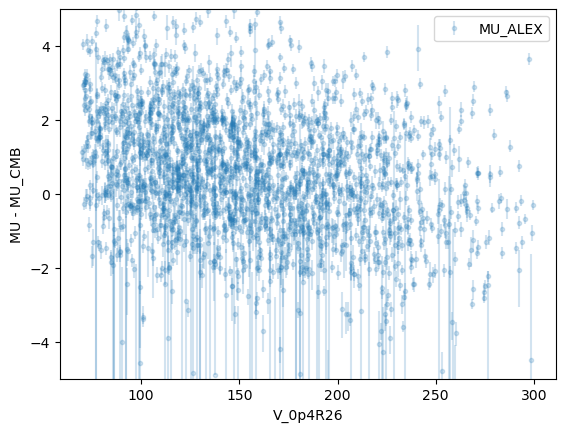

In [192]:
plt.errorbar(df["V_0p4R26"], df["MU_ALEX_50"]-df["MU_ZCMB"],[df["MU_ALEX_50"]-df["MU_ALEX_32"],df["MU_ALEX_68"]-df["MU_ALEX_50"]], fmt='.',label="MU_ALEX",alpha=0.2)
# plt.scatter(df["MU_ZCMB"], df["MU_TF"]-df["MU_ZCMB"],label="MU_TF")
plt.ylim((-5,5))
plt.xlabel("V_0p4R26")
plt.ylabel("MU - MU_CMB")
plt.legend()

(31.0, 40.0)

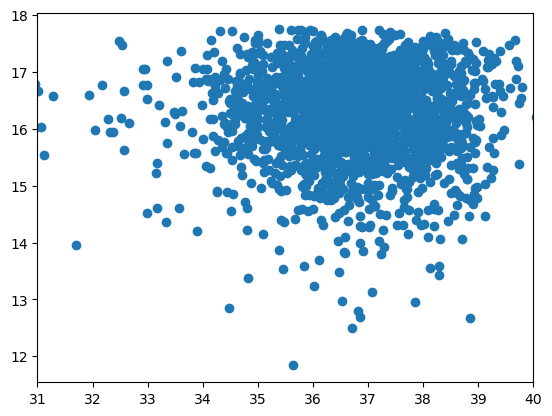

In [195]:
plt.scatter(df["MU_ALEX"], df["R_MAG_SB26"])
plt.xlim((31,40))

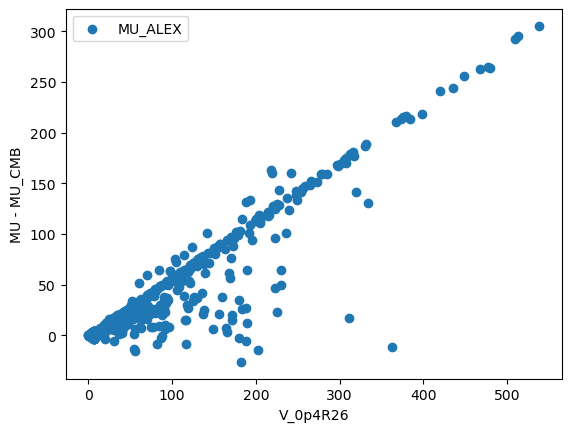

In [155]:
plt.scatter(df["MU_ALEX_ERR"], df["MU_ALEX_50"]-df["MU_ALEX"],label="MU_ALEX")
# plt.scatter(df["V_0p4R26"], df["MU_TF"]-df["MU_ZCMB"],label="MU_TF")
plt.xlabel("MU_ALEX_ERR")
plt.ylabel("MU - MU_CMB")
plt.legend()

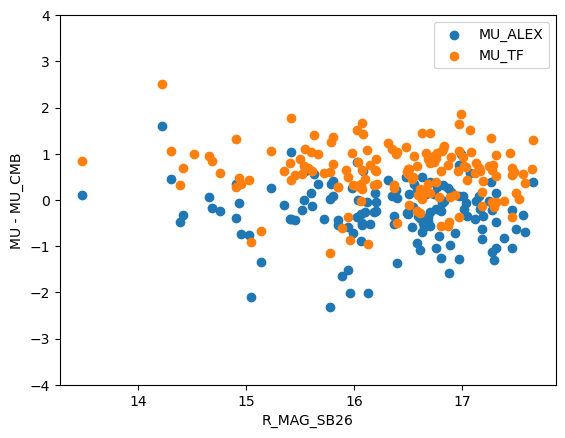

In [124]:
plt.scatter(df["R_MAG_SB26"], df["MU_ALEX"]-df["MU_ZCMB"],label="MU_ALEX")
plt.scatter(df["R_MAG_SB26"], df["MU_TF"]-df["MU_ZCMB"],label="MU_TF")
plt.ylim((-4,4))
plt.xlabel("R_MAG_SB26")
plt.ylabel("MU - MU_CMB")
plt.legend()

Text(0.5, 0, 'MU_CMB')

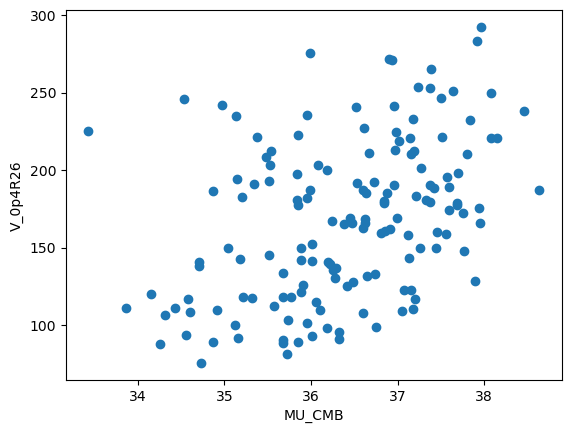

In [119]:
plt.scatter(df["MU_ZCMB"], df["V_0p4R26"])
plt.ylabel("V_0p4R26")
plt.xlabel("MU_CMB")

Text(0.5, 0, 'MU_CMB')

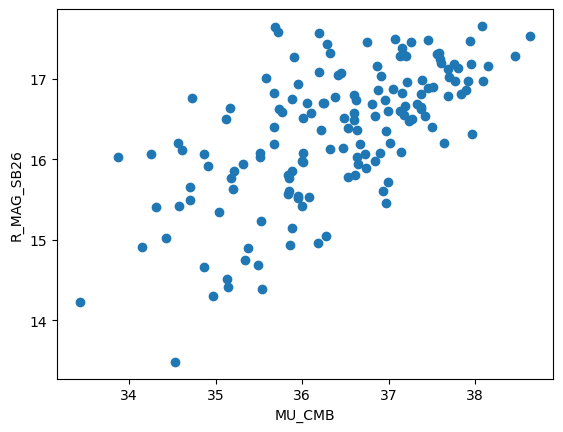

In [120]:
plt.scatter(df["MU_ZCMB"], df["R_MAG_SB26"])
plt.ylabel("R_MAG_SB26")
plt.xlabel("MU_CMB")

Text(0.5, 0, 'V_0p4R26')

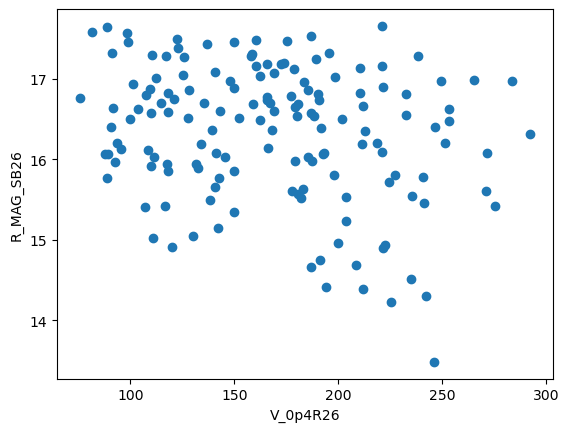

In [125]:
plt.scatter(df["V_0p4R26"], df["R_MAG_SB26"])
plt.ylabel("R_MAG_SB26")
plt.xlabel("V_0p4R26")

In [109]:
"""
Module to load the minimal information from a Stan CSV file.
Only the header row and data are read, no metadata is parsed.
"""
from typing import List, Tuple, Union

import numpy as np
import numpy.typing as npt


def read_csv(filenames: Union[str, List[str]]) -> Tuple[str, npt.NDArray[np.float64]]:
    """
    Reads CSV files like those produced by Stan, returning the header and data.

    If multiple files are given, the data is stacked along the first axis,
    so in typical usage, the shape of the returned data will be
    ``(n_chains, n_samples, n_params)``.

    Parameters
    ----------
    filenames : Union[str, List[str]]
        Path to the CSV file(s) to read.

    Returns
    -------
    Tuple[str, npt.NDArray[np.float64]]
        The header row and data from the CSV file(s).

    Raises
    ------
    ValueError
        If multiple files are given and the headers do not match between them.
    """

    if not isinstance(filenames, list):
        filenames = [filenames]

    header = ""
    data: List[npt.NDArray[np.float64]] = [None for _ in range(len(filenames))]  # type: ignore
    for i, f in enumerate(filenames):
        with open(f, "r") as fd:
            while (file_header := fd.readline()).startswith("#"):
                pass
            if header == "":
                header = file_header
            elif header != file_header:
                raise ValueError("Headers do not match")
            data[i] = np.loadtxt(fd, delimiter=",", comments="#")

    return header.strip(), np.stack(data, axis=0)

In [7]:
_df =[]

for i in range(1,5):
    _df.append(read_csv("/Users/akim/Projects/TFPV/tmp/output_fit/Y1/fit_1.csv".format(i)))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 48, saw 79369


In [ ]:
ans = read_csv(".

In [21]:
dat

(array([[ 2.20633358e-01, -1.13686497e-03, -2.31020457e-05,
         -2.63433555e-04,  2.07956668e-03,  4.16271179e-03],
        [-1.13686497e-03,  3.19685717e-03,  6.38597699e-06,
          2.95795108e-04, -1.86366144e-05, -2.02294556e-05],
        [-2.31020457e-05,  6.38597699e-06,  1.34759255e-05,
         -1.06682068e-06, -6.58979863e-07, -1.82958134e-07],
        [-2.63433555e-04,  2.95795108e-04, -1.06682068e-06,
          9.61411665e-05, -2.61249574e-06, -4.92335679e-06],
        [ 2.07956668e-03, -1.86366144e-05, -6.58979863e-07,
         -2.61249574e-06,  3.44173583e-05,  3.95839407e-05],
        [ 4.16271179e-03, -2.02294556e-05, -1.82958134e-07,
         -4.92335679e-06,  3.95839407e-05,  7.92027377e-05]]),
 [array([-6.90642, -6.51366, -7.61803, ..., -6.88185, -6.57998, -6.54124],
        shape=(4000,)),
  array([-19.36754166, -19.43567348, -19.35170774, ..., -19.38992869,
         -19.36459002, -19.4124891 ], shape=(4000,)),
  array([0.0630062, 0.0603218, 0.0591123, ..., 0.